<a href="https://colab.research.google.com/github/Html5intheway4/Emotion-recognition/blob/main/Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
img_array = cv2.imread('/content/drive/MyDrive/Training/0/Training_51146675.jpg')

In [4]:
print (img_array)

[[[  2   2   2]
  [  0   0   0]
  [  1   1   1]
  ...
  [ 63  63  63]
  [ 43  43  43]
  [ 28  28  28]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 68  68  68]
  [ 58  58  58]
  [ 43  43  43]]

 [[  0   0   0]
  [  2   2   2]
  [  3   3   3]
  ...
  [ 82  82  82]
  [ 74  74  74]
  [ 50  50  50]]

 ...

 [[116 116 116]
  [114 114 114]
  [115 115 115]
  ...
  [116 116 116]
  [119 119 119]
  [117 117 117]]

 [[113 113 113]
  [115 115 115]
  [115 115 115]
  ...
  [123 123 123]
  [118 118 118]
  [115 115 115]]

 [[112 112 112]
  [116 116 116]
  [114 114 114]
  ...
  [115 115 115]
  [115 115 115]
  [117 117 117]]]


In [5]:
img_array.shape

(48, 48, 3)

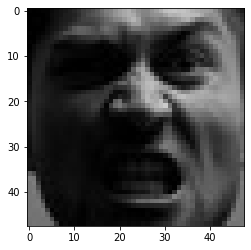

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = "/content/drive/MyDrive/Training"

In [8]:
Classes = ["0","1","2","3","4","5","6"]

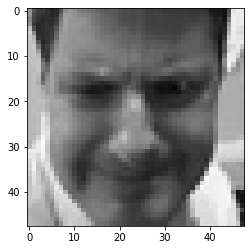

In [9]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
#         backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

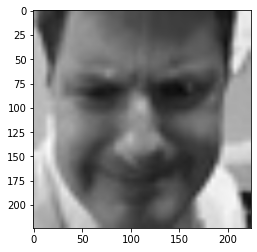

In [10]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

        

In [13]:
create_training_Data()

In [14]:
print(len(training_Data))

11815


In [15]:
temp = np.array(training_Data, dtype=object)

In [16]:
temp.shape

(11815, 2)

In [17]:
import random
random.shuffle(training_Data)

In [18]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [19]:
X.shape

(11815, 224, 224, 3)

In [20]:
for i in range(0,11815):
    X[i]=X[i]/255.0;

In [21]:
type(y)

list

In [22]:
Y = np.array(y)

In [23]:
Y.shape

(11815,)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [26]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [27]:
base_input = model.layers[0].input

In [28]:
base_output = model.layers[-2].output

In [29]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [30]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [31]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [32]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
# tf.debugging.set_log_device_placement(True)

# # Place tensors on the CPU
# with tf.device('/CPU:0'):
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
new_model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ["accuracy"])

In [35]:
new_model.fit(X,Y, epochs = 15)

Epoch 1/15
370/370 [==============================] - 91s 198ms/step - loss: 1.8295 - accuracy: 0.2318
Epoch 2/15
370/370 [==============================] - 77s 207ms/step - loss: 1.8235 - accuracy: 0.2349
Epoch 3/15
370/370 [==============================] - 77s 208ms/step - loss: 1.8227 - accuracy: 0.2386
Epoch 4/15
370/370 [==============================] - 77s 207ms/step - loss: 1.8200 - accuracy: 0.2399
Epoch 5/15
370/370 [==============================] - 77s 207ms/step - loss: 1.8163 - accuracy: 0.2422
Epoch 6/15
370/370 [==============================] - 77s 208ms/step - loss: 1.8186 - accuracy: 0.2405
Epoch 7/15
370/370 [==============================] - 77s 208ms/step - loss: 1.8172 - accuracy: 0.2410
Epoch 8/15
370/370 [==============================] - 77s 207ms/step - loss: 1.8131 - accuracy: 0.2437
Epoch 9/15
370/370 [==============================] - 76s 207ms/step - loss: 1.8137 - accuracy: 0.2452
Epoch 10/15
370/370 [==============================] - 77s 207ms/step - l

In [36]:
new_model.save('Final_model_95p07.h5')

In [118]:
frame = cv2.imread('/content/drive/MyDrive/happy.jfif')

In [119]:
frame.shape

(275, 183, 3)

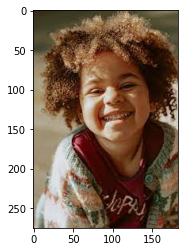

In [120]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [121]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/haarcascade_frontalface_default (1).xml')

In [122]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [123]:
gray.shape

(275, 183)

In [124]:
test = faceCascade.load('/content/drive/MyDrive/haarcascade_frontalface_default (1).xml')

print(test)

True


In [125]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)


In [126]:
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y: y+h,  x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0,), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if(len(facess)) == 0:
    print("Face not detected")
  else:
    for(ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex +ew]

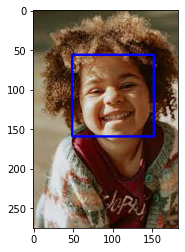

In [127]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

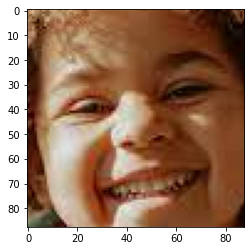

In [128]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [129]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [130]:
Predictions = new_model.predict(final_image)

In [131]:
Predictions[0]

array([3.1333968e-01, 7.6865908e-05, 1.5397282e-01, 1.2662788e-01,
       1.4751507e-01, 1.7377190e-02, 2.4109048e-01], dtype=float32)

In [132]:
np.argmax(Predictions)

0